1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:
 
Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'X':list(range(6)), 'Y':list(range(6))})

In [3]:
df

,X,Y
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5


2. Crear una función para calcular la función de coste.

In [4]:
def funcion_coste(theta0, theta1, df):
    # df: DataFrame
    m = df.shape[0]
    Y = df['Y']
    X = df['X']
    J = 1 / (2 * m) * sum([((theta0 + theta1 * X[i]) - Y[i])**2 for i in range(m)])
    return J

3. Asumiendo $\theta_0=0$, encuentre una representacion de gráfica de la función de coste para difeterentes valores de  $\theta_1$, ¿Cuál es el mínimo de la función de coste?, con este valor, grafique sobre los datos del dataframe construido la ecuación y regresión encontrada.


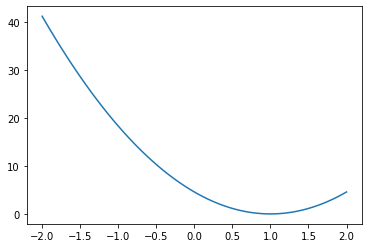

In [5]:
%matplotlib inline
theta1 = np.linspace(-2, 2, 100)
theta0 = 0
f = funcion_coste(theta0, theta1, df)
plt.plot(theta1, f)
plt.show()

In [6]:
from scipy.optimize import fmin_powell

In [7]:
ff = lambda y: funcion_coste(theta0, y, df)
minimun = fmin_powell(ff, 0)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 18


In [8]:
minimun

array([1.])

In [9]:
theta1_min = minimun[0]

In [10]:
def lineal(theta0, theta1, x):
    return theta0 + theta1 * x 

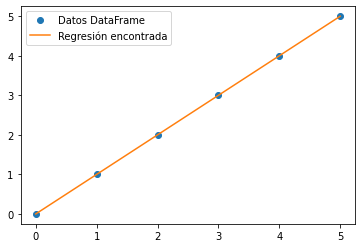

In [11]:
plt.plot(df['X'], df['Y'], 'o', label='Datos DataFrame')
plt.plot(df['X'], lineal(0, theta1_min, df['X']) , label=f'Regresión encontrada')
plt.legend()
plt.show()

4. Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera: 

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplar los metodos surface y contour dentro de la libreria de matplotlib.  Construya primero con los valores de $\theta_0$, $\theta_1 $ definidos un (np.mesgrid) y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```


En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo estan realizados de esta manera por motivos didácticos.

In [12]:
from mpl_toolkits import mplot3d

In [13]:
theta0 = np.linspace(-2, 2, 1000)
theta1 = np.linspace(-2, 2, 1000)
T0, T1 = np.meshgrid(theta0, theta1)
J = funcion_coste(T0, T1, df)

<IPython.core.display.Javascript object>


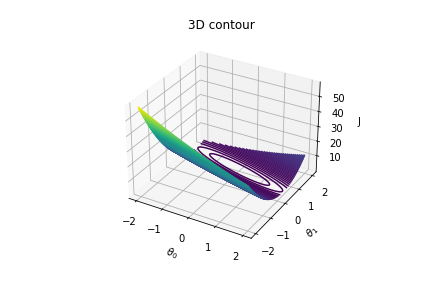

In [14]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(T0, T1, J, 200)
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('J')
ax.set_title('3D contour')
plt.show()

5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.

In [15]:
def surface(theta0, theta1, df):
    
    m = df.shape[0]
    a = 1/2
    b = 1 / m * sum(df['X'])
    c = 1 / (2 * m) * sum(df['X']**2)
    d = 1 / m * sum(df['Y'])
    e = 1 / m * sum(df['X']*df['Y'])
    f = 1 / (2 * m) * sum(df['Y']**2)
    sur = a * theta0**2 + b * theta0 * theta1 + c * theta1**2 + d * theta0 + e * theta1 + f
    
    return sur 

# Gradiente Descendente


Para determinar el minimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:
- Proponer un número aleatorios inicial $\omega_i$
- Para descender al mínimo de la función, encontremos un  valor para el cual 
el deriva de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo. 

- Evaluar $f(\omega_{i+1})$

- Iterar hasta encontrar el minimo de la función 


6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el minimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$




In [16]:
import sympy as sy

In [17]:
x = sy.Symbol('x')

In [18]:
f = sy.lambdify(x,sy.diff(x**5))
f(1)

5

In [19]:
def f(x): 
    return (x-4)**2

In [20]:
def gradiente_descendiente(f, alpha, epsilon):
    # Gradiente descendiente para funciones unidimensionales
    # Funcion con parametro x y calcular su derivada a través de sympy
    x = sy.Symbol('x')
    Df = sy.diff(f(x))
    Df = sy.lambdify(x, Df)
    
    w = np.random.randint(1, 5)
    wn = w - alpha * Df(w)
    
    while f(w) - f(wn) > epsilon:  
        #m = f(wn)
        w = wn
        wn = w - alpha * Df(w)
      
    return wn
    

In [21]:
gradiente_descendiente(f, alpha=1, epsilon=1e-4)

6

In [22]:
gradiente_descendiente(f, alpha=0.5, epsilon=1e-4)

4.0

In [23]:
gradiente_descendiente(f, alpha=0.1, epsilon=1e-4)

4.0

7. Para responder este punto puede consultar la siguiente  página y seguir el video[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contourno de la función.
  - Determine el valor mínimo de la funcion con el metodo del gradiente descendente.



In [24]:
def F(x, y):
    f = np.sin(1 / 2 * x ** 2 - 1 / 4 * y ** 2 + 3) * np.cos(2 * x + 1 - np.exp(y))
    return f


<IPython.core.display.Javascript object>


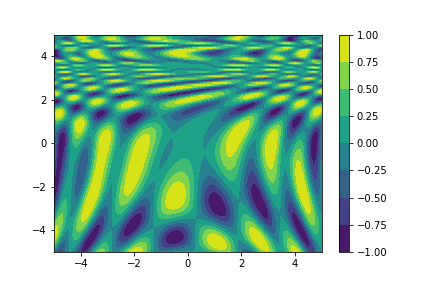

In [25]:
%matplotlib notebook
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = F(X, Y)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

In [26]:
def gradiente_descendiente_2D(f, alpha, epsilon):
    # Gradiente descendiente para funcions dos dimensional
    x = sy.Symbol('x')
    y = sy.Symbol('y')
    # Sympy function
    f_sy = f(x, y)   
  
    Dfx = f_sy.diff(x)
    Dfy = f_sy.diff(y)
  
    Dfx = sy.lambdify([x,y], Dfx)
    Dfy = sy.lambdify([x,y], Dfy)
    
    wx = np.random.randint(1,5)
    wy = np.random.randint(1,5)
    
    # para el eje -- x
    wnx = wx - alpha * Dfx(wx, wy)
    # para el eje -- y
    wny = wy - alpha * Dfy(wx, wy)  
    
    while f(wx, wy) - f(wnx, wny) > epsilon:  
        wx = wnx
        wy = wny
        wnx = wx - alpha * Dfx(wx, wy)
        wny = wy - alpha * Dfy(wx, wy)
      
    return wnx, wny
    

In [27]:
def Ff(x,y):
    f = sy.sin(1/2*x**2 - 1/4*y**2 + 3)*sy.cos( 2*x + 1 - sy.exp(y) )
    return f

In [28]:
x1, y1 = gradiente_descendiente_2D(Ff, alpha=0.1, epsilon=1e-4)
x1, y1

(4.097529887950912, 0.987457498393281)

In [29]:
x2, y2 = gradiente_descendiente_2D(Ff, alpha=0.01, epsilon=1e-4)
x2, y2

(2.17090305048027, 1.6724757182006065)

In [30]:
x3, y3 = gradiente_descendiente_2D(Ff, alpha=0.001, epsilon=1e-4)
x3, y3

(2.8343109387406726, 2.957302969618365)

<IPython.core.display.Javascript object>


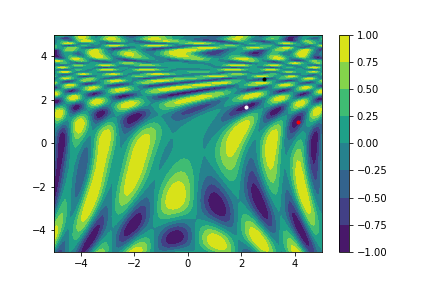

In [31]:
%matplotlib notebook
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = F(X, Y)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.plot(x1, y1, '.', c='red')
plt.plot(x2, y2, '.', c='white')
plt.plot(x3, y3, '.', c='k')
plt.show()

8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores, 
construya un algorítmo que permita determinar una regresión lineal.



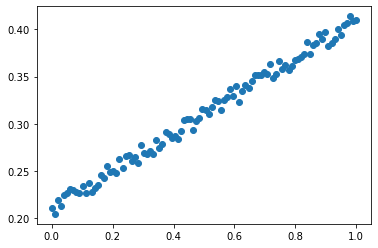

In [32]:
%matplotlib inline
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2 * X + 0.02 * np.random.random(100)

plt.scatter(X, y)
plt.show()

In [33]:
# Pasando a un DataFrame los datos dados
df1 = pd.DataFrame({'X': X, 'Y': y})
df1

,X,Y
0,0.000000,0.211441
1,0.010101,0.204736
2,0.020202,0.219247
3,0.030303,0.213527
4,0.040404,0.224230
...,...,...
95,0.959596,0.404611
96,0.969697,0.406428
97,0.979798,0.413796
98,0.989899,0.409100


Suponiendo que la ecuación que puede modelar los datos es una linea recta (también porque su patrón lo sigue), se implementa la función de coste con la función $h$ de la siguiente manera:

$$h(\theta_0, \theta_1) = \theta_0 + \theta_1X$$

De tal manera que:

$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} [h(\theta_0, \theta_1) - Y]^2 = \frac{1}{2m} \sum_{i=1}^{m} [\theta_0 + \theta_1X - Y]^2 $$

Donde $m$ es el número de datos (puntos) dados.

Entonces para hallar la mejor linea recta que la modela, se hace uso del gradiente descendiente para hallar los valores de $\theta_0$ y $\theta_1$ que hacen minimo la función de coste $J$.

In [34]:
# Funcion coste
def funcion_coste(theta0, theta1, df):
    # df: DataFrame
    m = df.shape[0]
    Y = df['Y']
    X = df['X']
    J = 1 / (2 * m) * sum([((theta0 + theta1 * X[i]) - Y[i])**2 for i in range(m)])
    return J

In [35]:
# Funcion de coste para los (X, y) dados
fn = lambda th0, th1: funcion_coste(th0, th1, df1)

In [36]:
th0_1, th1_1 = gradiente_descendiente_2D(fn, alpha=0.1, epsilon=1e-8)
th0_1, th1_1

(0.21294990811235676, 0.19547404127929047)

In [37]:
th0_2, th1_2 = gradiente_descendiente_2D(fn, alpha=0.01, epsilon=1e-8)
th0_2, th1_2

(0.2037076311378329, 0.2127192111389092)

In [38]:
th0_3, th1_3 = gradiente_descendiente_2D(fn, alpha=0.001, epsilon=1e-8)
th0_3, th1_3

(0.2330248869688567, 0.15801612682131866)

<IPython.core.display.Javascript object>


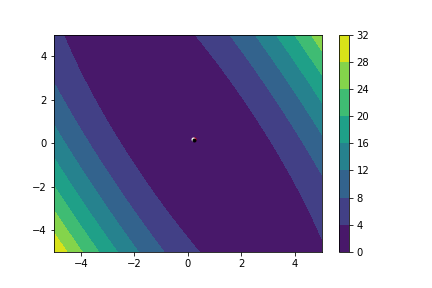

In [39]:
%matplotlib notebook
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = fn(X, Y)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.plot(th0_1, th1_1, '.', c='red')
plt.plot(th0_2, th1_2, '.', c='white')
plt.plot(th0_3, th1_3, '.', c='k')
plt.show()

In [40]:
def linearecta(th0, th1, x):
    return th0 + th1*x

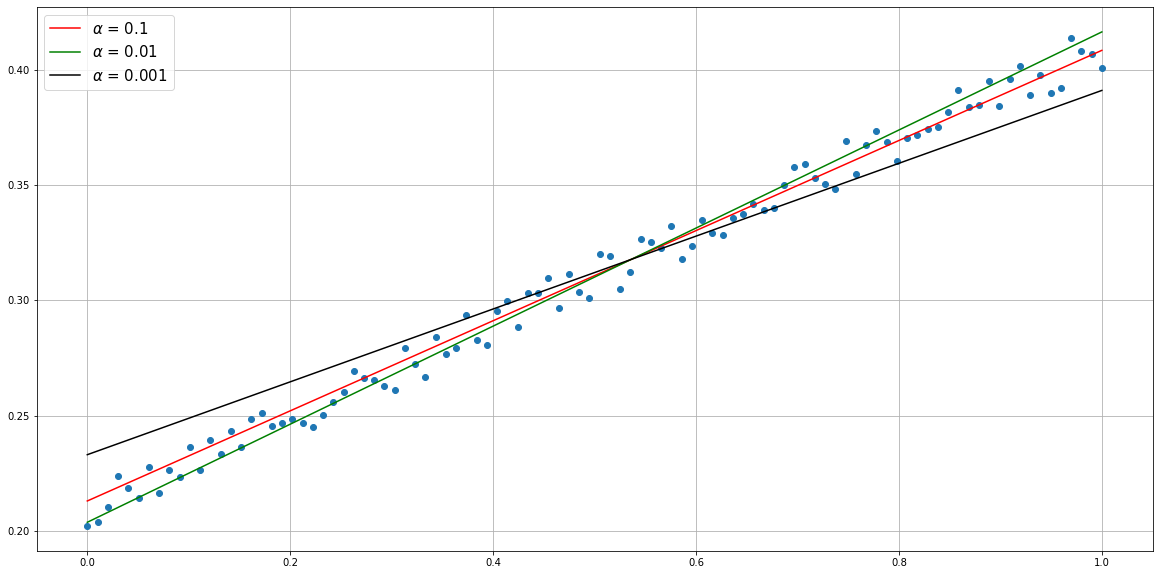

In [41]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2 * X + 0.02 * np.random.random(100)

plt.plot(X, y, 'o')
plt.plot(X, linearecta(th0_1, th1_1, X), c='red', label=r'$\alpha$ = 0.1')
plt.plot(X, linearecta(th0_2, th1_2, X), c='green', label=r'$\alpha$ = 0.01')
plt.plot(X, linearecta(th0_3, th1_3, X), c='k', label=r'$\alpha$ = 0.001')
plt.legend(fontsize=15)
plt.grid()
plt.show()

9. Compare su resultado empleando la libreria linearRegresion() de sklearn.

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
X = X.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9897903092203904

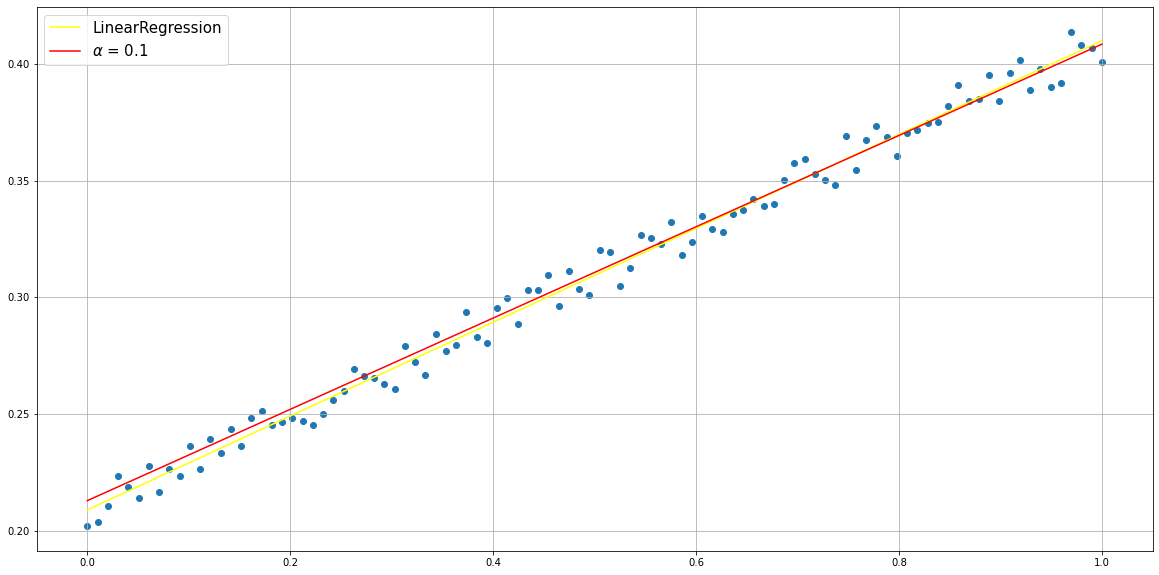

In [44]:
fig = plt.figure(figsize=(20,10))
Y_pred = reg.predict(X)
# Y_pred = Y_pred.reshape(-1, 1)
plt.scatter(X, y)
plt.plot(X, Y_pred, c='yellow', label='LinearRegression')
plt.plot(X, linearecta(th0_1, th1_1, X), c='red', label=r'$\alpha$ = 0.1')
plt.legend(fontsize=15)
plt.grid()
plt.show()

Con la mejor linea recta obtenida con el gradiente descendiente y la función de coste con $\alpha = 0.1$ que modela los datos dados y con la regresión lineal a partir de la librería `LinearRegression()` se puede observar que hay una gran similitud entre ambas, lo que permite una buena predicción de los datos con estas lineas rectas. 